In [1]:
import numpy as np
from math import sqrt
from sklearn import datasets, linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from evaluacion_funciones import * # pip install graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from pprint import pprint

In [2]:
# Carga de datos.
dataset = datasets.load_boston()
X = dataset.data
y = dataset.target
print(np.shape(X))

(506, 13)


In [3]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': metrics.mean_squared_error,
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [4]:
# Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_training = standardizer.fit_transform(X)

In [5]:
# Selección de atributos
sel = SelectPercentile(score_func=f_regression, percentile=10)
X_training = sel.fit_transform(X_training, y)

In [9]:
# Construcción del algoritmo de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean')
# reg = linear_model.LinearRegression()

In [10]:
# Validación cruzada interna
# Extracción de predicciones con cross_val_predict
y_pred = cross_val_predict(reg, X_training, y, cv = KFold(n_splits=10, shuffle=True, random_state=42))

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_val_score(reg, X_training, y, 
                                    cv = KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))



cross_val_MAE:   3.0844 +/- 0.3789


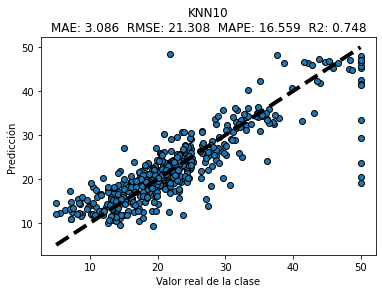

In [11]:
# Visualización de resultados
results = evaluacion(y, y_pred, metricas)
grafica_real_vs_pred(y, y_pred, results, "KNN"+str(k))